<a href="https://colab.research.google.com/github/thepianist9/AutoEncoder-Cifar10/blob/master/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
 df = pd.read_csv("/content/drive/My Drive/train.csv")

In [4]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.00000

In [6]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [7]:
#2 number of targets in right proportion?
print(df.target.value_counts().values)
print("Number of 0's are more than number of 1's and are out of proportion.")

[573518  21694]
Number of 0's are more than number of 1's and are out of proportion.


In [8]:
categorical = []
binary = []
continuous = []

for i in df.columns:
  if 'cat' in i:
    categorical.append(i)
  elif 'bin' in i:
    binary.append(i)
  else:
    continuous.append(i)

In [9]:
df[continuous].describe()

,id,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.551102,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,4.293678e+05,0.187401,1.983789,2.699902,0.127545,3.546042,0.287643,0.404264,0.793506,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.525000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,7.435475e+05,0.000000,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.720677,3.000000,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,1.115549e+06,0.000000,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.000000,3.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,1.488027e+06,1.000000,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [10]:
#1 Inferences
print("1. In certain features of the dataset the MEAN is more than the MEDIAN and the MAX value is more than the 75th percentile"
        "\nvalue which suggests that there are outliers in the data.\n")
print("2. The target feature is a binary valued column")

1. In certain features of the dataset the MEAN is more than the MEDIAN and the MAX value is more than the 75th percentile
value which suggests that there are outliers in the data.

2. The target feature is a binary valued column


In [11]:
#3 number of categorical features
print("3. number of categorical features:", len(categorical))

#4 number of binary features
print("4. number of binary features:", len(binary))

3. number of categorical features: 14
4. number of binary features: 17


In [12]:
continuous

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [13]:
df.ps_reg_03.isnull().sum()

0

In [14]:
#checking columns with null values
df = df.replace(-1, value=np.NaN)
df.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [15]:
df['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [16]:
print("1. Imbalance in the target data is about: 3.78% \n")
print("2. Totally 9 features or columns in the data have missing values \n")
print("3.\"ps_car_03_cat\" and \"ps_car_05_cat\" are the two columns with the most null values")

1. Imbalance in the target data is about: 3.78% 

2. Totally 9 features or columns in the data have missing values 

3."ps_car_03_cat" and "ps_car_05_cat" are the two columns with the most null values


In [17]:
#continuous using imputer and mean of the column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[continuous[2:]]=pd.DataFrame(imputer.fit_transform(df[continuous[2:]]))

In [18]:
print("All the null valued - nominal variables have been imputed with the mean of their respective columns")

All the null valued - nominal variables have been imputed with the mean of their respective columns


In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
for i in categorical:
    df = pd.concat([df,pd.get_dummies(df[i], prefix=i)],axis=1)
    df.drop([i],axis=1, inplace=True)

In [20]:
corr = df[continuous].corr()

In [21]:
corr_list = []
def find_corr(row):
    for i in continuous:
        if row[i]>=0.5 and row[i]<1 and i not in corr_list:
            corr_list.append(i)
    return

In [22]:
var = corr.apply(find_corr, axis = 1)

In [23]:
print("the nominal variables with a correlation value of more than 0.5 are:")
print(corr_list)

the nominal variables with a correlation value of more than 0.5 are:
['ps_reg_03', 'ps_reg_02', 'ps_car_13', 'ps_car_14', 'ps_car_12', 'ps_car_15']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


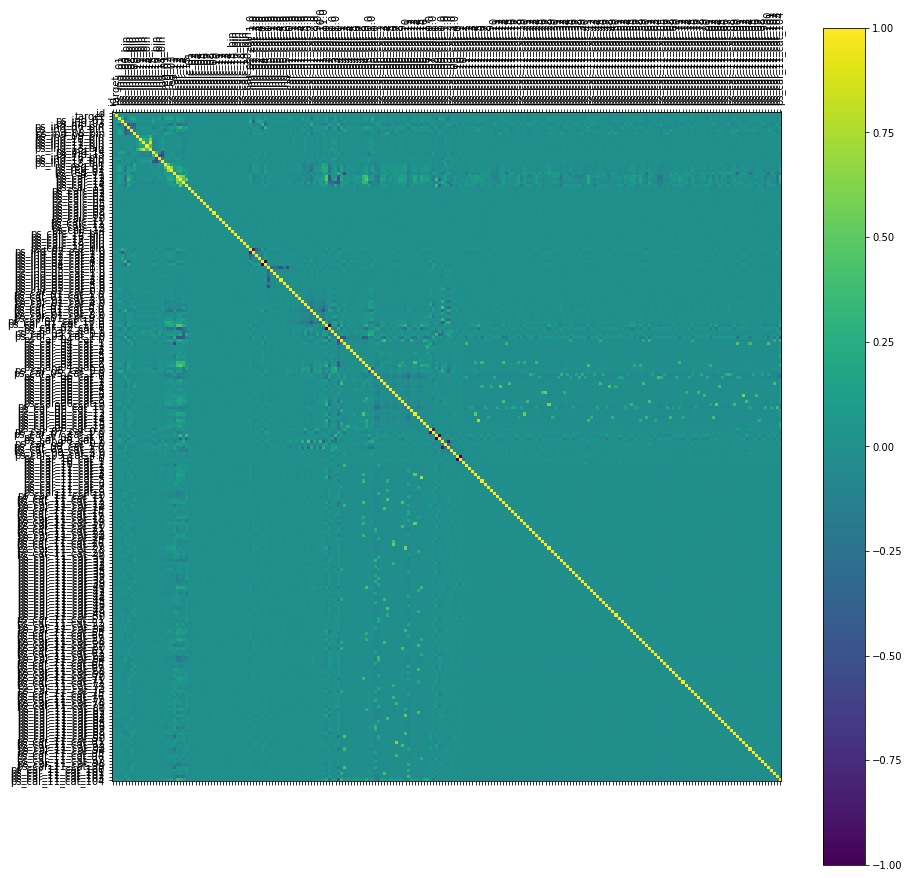

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))

plt.matshow(df.corr(), 1)
plt.xticks(range(len(df.columns)), df.columns, rotation = 90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [25]:
print(" the level of correlation is confirmed with the help of the correlation plot")

 the level of correlation is confirmed with the help of the correlation plot


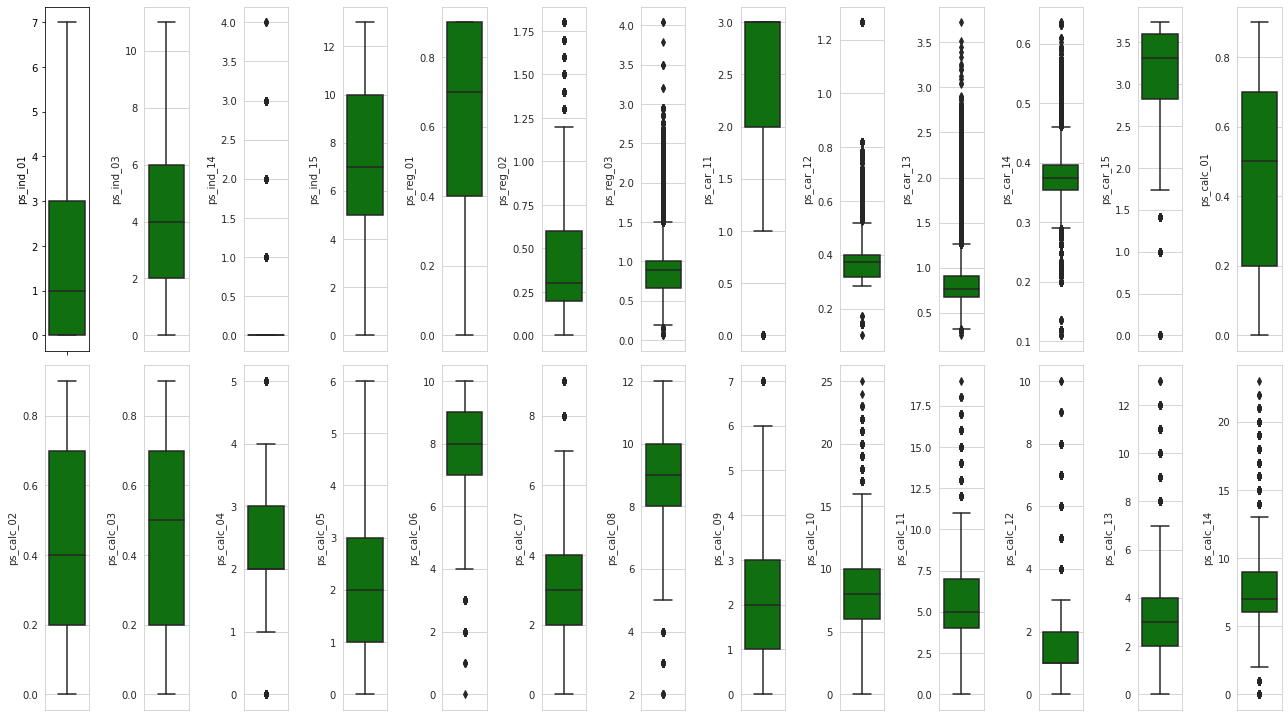

In [26]:
l = len(continuous)
number_of_columns=13
number_of_rows = l-1/number_of_columns
plt.figure(figsize=(number_of_columns+5,5*number_of_rows))
for i in range(2,l):
    plt.subplot(number_of_rows + 1,number_of_columns,i-1)
    sns.set_style('whitegrid')
    sns.boxplot(df[continuous[i]],color='green',orient='v')
    plt.tight_layout()

plt.show()

In [27]:
#inferences from box-plots 
print("6. columns: ps_reg_02, ps_reg_03, ps_car_12, ps_car_13, ps_car14, ps_car_15, ps_calc_10,ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14 from the boxplot")
print("confirms the presence of outliers in the data.")

6. columns: ps_reg_02, ps_reg_03, ps_car_12, ps_car_13, ps_car14, ps_car_15, ps_calc_10,ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14 from the boxplot
confirms the presence of outliers in the data.


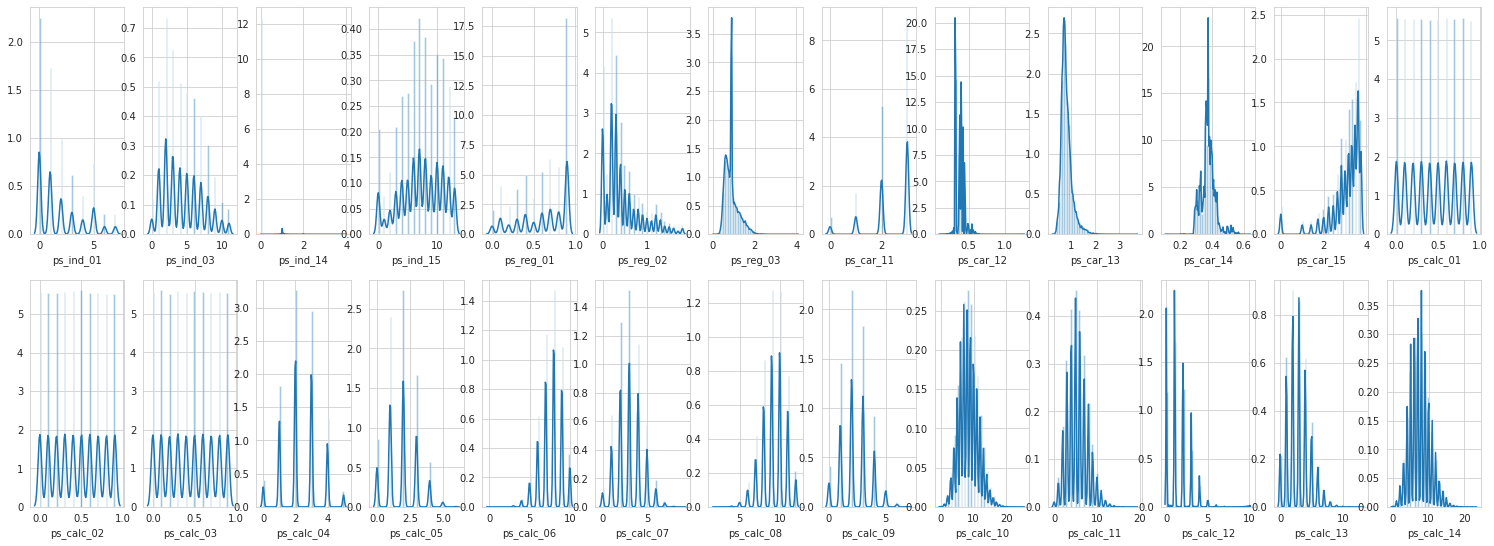

In [28]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(2,l):
    plt.subplot(number_of_rows + 1,number_of_columns,i-1)
    sns.distplot(df[continuous[i]],kde=True) 

In [29]:
# number of records when minority is at 12%

print("Number of Records of minority at 12%: 7083")


Number of Records of minority at 12%: 7083


In [30]:
df['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [31]:
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [32]:
from sklearn.utils import resample
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=80000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.target.value_counts()

0    80000
1    21694
Name: target, dtype: int64

In [33]:
X = df_downsampled.iloc[:,2:]
y = df_downsampled.iloc[:,1]

In [34]:
#Scaling the contiuous values to have their centre as 0
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X[continuous[2:]])
X = scaler.transform(X[continuous[2:]])

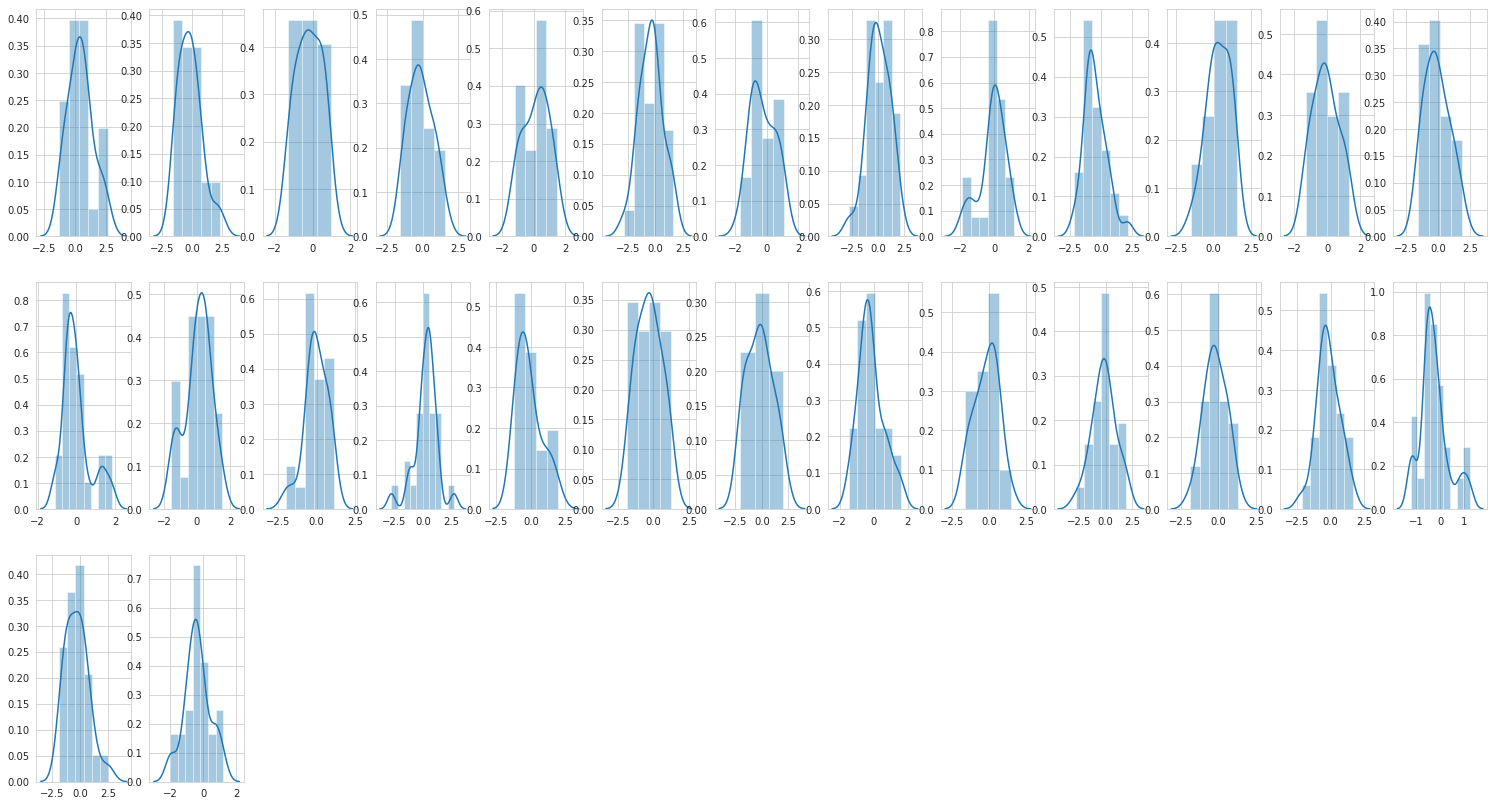

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
l = len(continuous)
number_of_columns=13
number_of_rows = l-1/number_of_columns

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(l):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(X[i],kde=True) 


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight={1:3.5, 0:1})
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 3.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = lr.predict(x_test)

In [39]:
y.value_counts()

0    80000
1    21694
Name: target, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

score = accuracy_score(y_test, y_pred)
metrics = precision_recall_fscore_support(y_test, y_pred)

print(metrics)
print(score)

print("=> Since the recall values for class 1 is very low hence the f1-score value is nearly 0 for class 1")

print("=> On increasing the class weight the f1-score increases from 0.008->0.34")

       0     1
0  17174  9326
1   3665  3395
(array([0.82412784, 0.26688153]), array([0.64807547, 0.48087819]), array([0.72557511, 0.34325868]), array([26500,  7060]))
0.6129022646007152
=> Since the recall values for class 1 is very low hence the f1-score value is nearly 0 for class 1
=> On increasing the class weight the f1-score increases from 0.008->0.34


In [41]:
print("Number of misclassified predictions are still high which means shows ambiguity in the prediction i.e.if a person will claim the insurance or no")

Number of misclassified predictions are still high which means shows ambiguity in the prediction i.e.if a person will claim the insurance or no


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



# param_C = [0.1]
# param_grid = {'C': param_C, 'kernel': ['linear'], 'gamma': [0.1], 'max_iter' : [20000], 'random_state': [42], 'class_weight':[{1:1, 0:1}, {1:3.5, 0:1}, {1:2, 0:1}]}

# clf = GridSearchCV(SVC(), cv = 5, param_grid= param_grid, refit=True)

# clf.fit(x_train, y_train)


In [43]:
# clf.best_params_

In [44]:
from sklearn.svm import SVC

svc = SVC(C=0.1, class_weight={0:1, 1:1}, gamma=0.1, kernel = 'linear', max_iter=20000, random_state=42)

In [45]:
# svc.fit(x_train, y_train)
# y_pred1 = svc.predict(x_test)
# print(pd.DataFrame(confusion_matrix(y_test, y_pred1)))

# score = accuracy_score(y_test, y_pred1)
# metrics = precision_recall_fscore_support(y_test, y_pred1)

# print(metrics)
# print(score)

In [46]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=80000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_downsampled[df_downsampled['target'] == 0]])
 
# Display new class counts
df_upsampled.target.value_counts()

1    80000
0    80000
Name: target, dtype: int64

In [73]:
X_bal = df_upsampled.iloc[:,2:]
y_bal = df_upsampled.iloc[:,1]

x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.25, random_state=42)

In [48]:
# svc.fit(x_train_bal, y_train_bal)
# predict_svc = svc.predict(x_test_bal)

# score = accuracy_score(y_test_bal, predict_svc)
# metrics = precision_recall_fscore_support(y_test_bal, predict_svc)

# print("**************************************")
# print("Accuracy Score:", score)
# print("**************************************")
# print("Confusion Matrix:")
# print(pd.DataFrame(confusion_matrix(y_test_bal, predict_svc)), "\n")
# print("**************************************")
# print(pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

On a upsmapled-balanced dataset the model is predicting even minority class labels but still sccuracy is low


In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(kernel='linear', C=0.1, class_weight='balanced', verbose=True, random_state=42)
xgb.fit(x_train_bal, y_train_bal)

XGBClassifier(C=0.1, base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, kernel='linear', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbose=True, verbosity=1)

In [50]:
predict_xgb = xgb.predict(x_test_bal)
score = accuracy_score(y_test_bal, predict_xgb)
metrics = precision_recall_fscore_support(y_test_bal, predict_xgb)

print("**************************************")
print("Accuracy Score:", score)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, predict_xgb)))
print("**************************************")
print(pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.602625
**************************************
Confusion Matrix:
       0      1
0  12675   7480
1   8415  11430
**************************************
                      0             1
Precision      0.600996      0.604442
Recall         0.628876      0.575964
F1-score       0.614620      0.589859
Support    20155.000000  19845.000000 



In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Dropout


Using TensorFlow backend.


In [53]:
x_train_bal.shape

(120000, 218)

In [82]:
model = Sequential()
model.add(Dense(256, input_shape=(218,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               56064     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [83]:
model.fit(x_train_bal, y_train_bal, batch_size=250, epochs=100, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 4s 42us/step - loss: 0.7263 - accuracy: 0.5513 - val_loss: 0.6699 - val_accuracy: 0.5855
Epoch 2/100
96000/96000 [==============================] - 3s 35us/step - loss: 0.6705 - accuracy: 0.5874 - val_loss: 0.6701 - val_accuracy: 0.5923
Epoch 3/100
96000/96000 [==============================] - 3s 35us/step - loss: 0.6638 - accuracy: 0.5995 - val_loss: 0.6658 - val_accuracy: 0.5970
Epoch 4/100
96000/96000 [==============================] - 3s 35us/step - loss: 0.6600 - accuracy: 0.6068 - val_loss: 0.6649 - val_accuracy: 0.5970
Epoch 5/100
96000/96000 [==============================] - 3s 34us/step - loss: 0.6570 - accuracy: 0.6099 - val_loss: 0.6723 - val_accuracy: 0.5978
Epoch 6/100
96000/96000 [==============================] - 3s 34us/step - loss: 0.6537 - accuracy: 0.6143 - val_loss: 0.6677 - val_accuracy: 0.5957
Epoch 7/100
96000/96000 [==============================] - 3s 

In [77]:
x_train_bal.shape

(120000, 218)

In [84]:
y_pred1 = model.predict_classes(x_test_bal)
score_n1 = accuracy_score(y_test_bal, y_pred1)
metrics_n1 = precision_recall_fscore_support(y_test_bal, y_pred1)

print("**************************************")
print("Accuracy Score:", score_n1)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred1)))
print("**************************************")
print(pd.DataFrame(metrics_n1, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.76845
**************************************
Confusion Matrix:
       0      1
0  13402   6753
1   2509  17336
**************************************
                      0             1
Precision      0.842310      0.719665
Recall         0.664947      0.873570
F1-score       0.743193      0.789184
Support    20155.000000  19845.000000 



In [85]:
model1 = Sequential()
model1.add(Dense(256, input_shape=(218,), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.2))
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.2))
model1.add(Dense(1024, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               56064     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [86]:
model1.fit(x_train_bal, y_train_bal, batch_size=250, epochs=100, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 6s 59us/step - loss: 0.7326 - accuracy: 0.5358 - val_loss: 0.6801 - val_accuracy: 0.5780
Epoch 2/100
96000/96000 [==============================] - 5s 49us/step - loss: 0.6756 - accuracy: 0.5820 - val_loss: 0.6699 - val_accuracy: 0.5906
Epoch 3/100
96000/96000 [==============================] - 5s 48us/step - loss: 0.6656 - accuracy: 0.5959 - val_loss: 0.6681 - val_accuracy: 0.5976
Epoch 4/100
96000/96000 [==============================] - 5s 48us/step - loss: 0.6616 - accuracy: 0.6027 - val_loss: 0.6666 - val_accuracy: 0.5979
Epoch 5/100
96000/96000 [==============================] - 5s 48us/step - loss: 0.6587 - accuracy: 0.6089 - val_loss: 0.6686 - val_accuracy: 0.6037
Epoch 6/100
96000/96000 [==============================] - 5s 47us/step - loss: 0.6549 - accuracy: 0.6129 - val_loss: 0.6629 - val_accuracy: 0.6050
Epoch 7/100
96000/96000 [==============================] - 5s 

In [87]:
y_pred2 = model1.predict_classes(x_test_bal)
score_n2 = accuracy_score(y_test_bal, y_pred2)
metrics_n2 = precision_recall_fscore_support(y_test_bal, y_pred2)

print("**************************************")
print("Accuracy Score:", score_n2)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred2)))
print("**************************************")
print(pd.DataFrame(metrics_n1, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.791425
**************************************
Confusion Matrix:
       0      1
0  14648   5507
1   2836  17009
**************************************
                      0             1
Precision      0.842310      0.719665
Recall         0.664947      0.873570
F1-score       0.743193      0.789184
Support    20155.000000  19845.000000 



In [71]:
y_pred1

array([1, 1, 1, ..., 1, 0, 1])

In [72]:
scoren1= accuracy_score(y_test_bal, y_pred1)

ValueError: ignored

In [88]:
model2 = Sequential()
model2.add(Dense(256, input_shape=(218,), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.2))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.2))
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.2))
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.2))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.2))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               56064     
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)              

In [90]:
model2.fit(x_train_bal, y_train_bal, batch_size=250, epochs=100, verbose=1, validation_split=0.2)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 8s 80us/step - loss: 0.7345 - accuracy: 0.5281 - val_loss: 0.6810 - val_accuracy: 0.5739
Epoch 2/100
96000/96000 [==============================] - 6s 64us/step - loss: 0.6797 - accuracy: 0.5757 - val_loss: 0.6708 - val_accuracy: 0.5872
Epoch 3/100
96000/96000 [==============================] - 6s 65us/step - loss: 0.6685 - accuracy: 0.5925 - val_loss: 0.6725 - val_accuracy: 0.5965
Epoch 4/100
96000/96000 [==============================] - 6s 65us/step - loss: 0.6631 - accuracy: 0.6001 - val_loss: 0.6664 - val_accuracy: 0.5922
Epoch 5/100
96000/96000 [==============================] - 6s 64us/step - loss: 0.6603 - accuracy: 0.6060 - val_loss: 0.6624 - val_accuracy: 0.6044
Epoch 6/100
96000/96000 [==============================] - 6s 64us/step - loss: 0.6574 - accuracy: 0.6107 - val_loss: 0.6646 - val_accuracy: 0.5989
Epoch 7/100
96000/96000 [==============================] - 6s 

In [91]:
y_pred3 = model2.predict_classes(x_test_bal)
score_n3 = accuracy_score(y_test_bal, y_pred3)
metrics_n3 = precision_recall_fscore_support(y_test_bal, y_pred3)

print("**************************************")
print("Accuracy Score:", score_n3)
print("**************************************")
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test_bal, y_pred3)))
print("**************************************")
print(pd.DataFrame(metrics_n3, index=['Precision', 'Recall', 'F1-score', 'Support']),"\n")

**************************************
Accuracy Score: 0.789
**************************************
Confusion Matrix:
       0      1
0  15140   5015
1   3425  16420
**************************************
                      0             1
Precision      0.815513      0.766037
Recall         0.751178      0.827412
F1-score       0.782025      0.795543
Support    20155.000000  19845.000000 

